In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../EDA/numData.csv')
Y = pd.read_csv('../EDA/y.csv')

In [20]:
y_hist = Y.drop(columns=["year"], axis=0)

<AxesSubplot:>

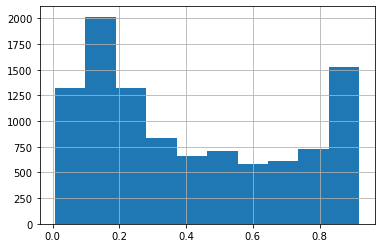

In [33]:
# plt.figure(figsize=(15,9))
y_hist["v2x_polyarchy"].hist()

In [4]:
X_AfterColdWar = dataset[dataset["year"] >= 1990]
X_BeforeColdWar = dataset[dataset["year"] < 1990]

In [5]:
X_without = dataset.drop(columns=["year","country"], axis=0)
X_AfterColdWar_without = X_AfterColdWar.drop(columns=["year","country"], axis=0)
X_BeforeColdWar_without = X_BeforeColdWar.drop(columns=["year","country"], axis=0)

In [6]:
bigMissing = X_without.isna().sum()[(X_without.isna().sum() / X_without.shape[0]) > 0.6].keys()
X_without = X_without.drop(columns=bigMissing, axis=0)

In [7]:
X_without = X_without.replace(np.inf, 0)
X_without = X_without.replace(-np.inf, 0)
X_without = X_without.fillna(0)

X_BeforeColdWar_without = X_BeforeColdWar_without.replace(np.inf, 0)
X_BeforeColdWar_without = X_BeforeColdWar_without.replace(-np.inf, 0)
X_BeforeColdWar_without = X_BeforeColdWar_without.fillna(0)

X_AfterColdWar_without = X_AfterColdWar_without.replace(np.inf, 0)
X_AfterColdWar_without = X_AfterColdWar_without.replace(-np.inf, 0)
X_AfterColdWar_without = X_AfterColdWar_without.fillna(0)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X_without)
X_aCW = StandardScaler().fit_transform(X_AfterColdWar_without)
X_bCW = StandardScaler().fit_transform(X_BeforeColdWar_without)

pca = PCA()
principalComponents = pca.fit_transform(X)

principalComponents_bCW = pca.fit_transform(X_bCW)
principalComponents_aCW = pca.fit_transform(X_aCW)

PCA_components = pd.DataFrame(principalComponents)
PCA_components_bCW = pd.DataFrame(principalComponents_bCW)
PCA_components_aCW = pd.DataFrame(principalComponents_aCW)

In [9]:
from sklearn import mixture

components = 9
features = 5

gmm = mixture.GaussianMixture(n_components=components, covariance_type='full')
labels = gmm.fit_predict(PCA_components.iloc[:,:features])

X_without["gmmLabels-"+str(components)+str(features)] = labels
dataset["gmmLabels-"+str(components)+str(features)] = labels


In [10]:
from sklearn.cluster import KMeans

components = 9
features = 5

gmm = KMeans(n_clusters=components)
labelsKmm = gmm.fit_predict(PCA_components.iloc[:,:features])

X_without["kmmLabels-"+str(components)+str(features)] = labelsKmm
dataset["kmmLabels-"+str(components)+str(features)] = labelsKmm

In [11]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import scipy.cluster.hierarchy as shc

components = 5
features = 8

cluster = shc.linkage(PCA_components.iloc[:,:features], method='complete')
cluster_array = fcluster(cluster, components, criterion='maxclust')

X_without["LinkLabels-"+str(components)+str(features)] = cluster_array
dataset["LinkLabels-"+str(components)+str(features)] = cluster_array


In [12]:
checkingMatrix = dataset.iloc[:,-12:]

In [13]:
import sklearn.metrics as skMetrics

labels = checkingMatrix.iloc[:,-3:]

zerosArray = np.zeros((3,3))


for x in range(3):
    for y in range(3):
        randIndex = skMetrics.adjusted_rand_score(labels.iloc[:,x],labels.iloc[:,y])
        zerosArray[x][y] = randIndex

np.savetxt("rand.csv", zerosArray, delimiter=",", fmt='%s')

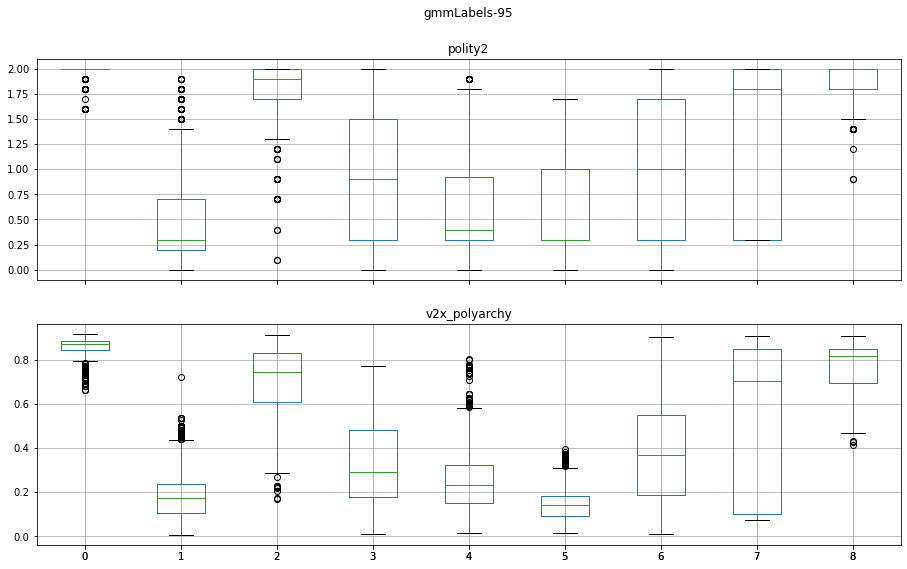

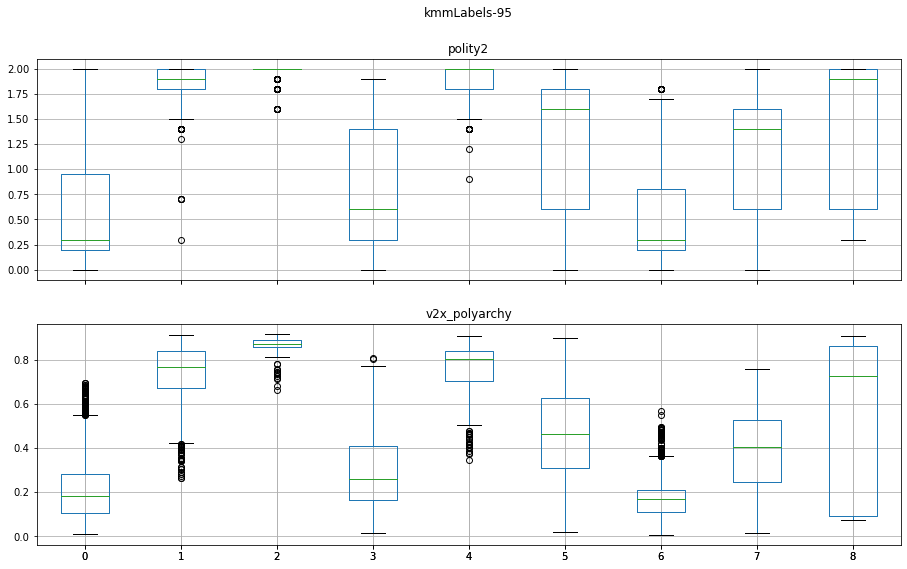

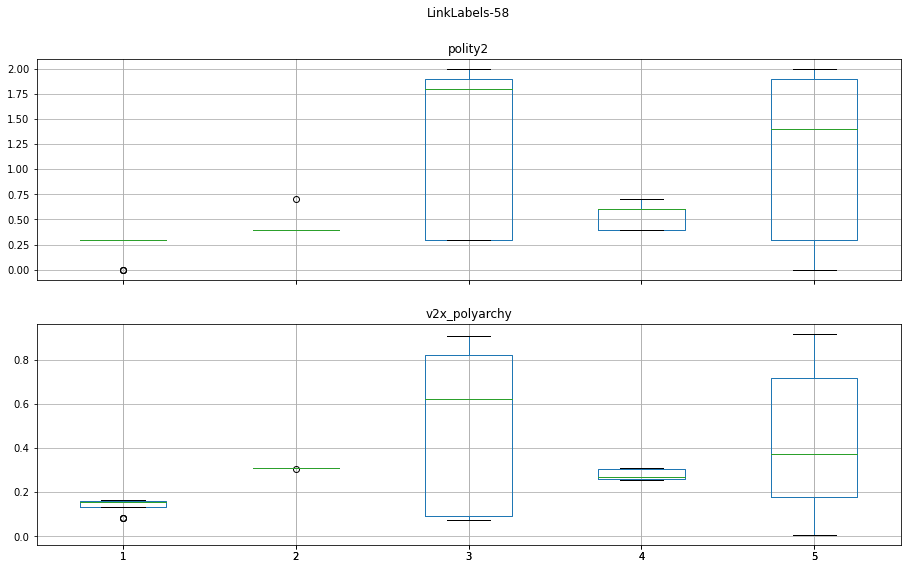

In [14]:
# setToCompare = "gmmLabels-95"

setsToCompare = ["gmmLabels-95","kmmLabels-95","LinkLabels-58"]

for setToCompare in setsToCompare:
    fig,axs = plt.subplots(2,1,figsize=(15,9),sharex=True)
    cleaned = checkingMatrix

    bp=cleaned.boxplot(by=setToCompare,column='polity2',ax=axs[0])
    bp=cleaned.boxplot(by=setToCompare,column='v2x_polyarchy',ax=axs[1])

    for ax in axs:
        ax.set_xlabel("")

    fig.suptitle(setToCompare)

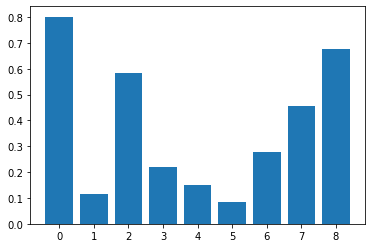

LeveneResult(statistic=263.2666184150242, pvalue=0.0)
NormaltestResult(statistic=223.61759810152716, pvalue=2.7672955456046276e-49) LeveneResult(statistic=263.2666184150242, pvalue=0.0)
LeveneResult(statistic=93.68437585671003, pvalue=9.841892831780542e-22)
Compare v2x_libdem, of cluster 0  against: 1 : Ttest_indResult(statistic=204.28028097365547, pvalue=0.0)

LeveneResult(statistic=835.5902500455824, pvalue=3.4313381944549273e-158)
Compare v2x_libdem, of cluster 0  against: 2 : Ttest_indResult(statistic=33.79913338004298, pvalue=1.2463634962210814e-205)

LeveneResult(statistic=487.4191292773409, pvalue=1.2563404137838385e-100)
Compare v2x_libdem, of cluster 0  against: 3 : Ttest_indResult(statistic=107.54735727384036, pvalue=0.0)

LeveneResult(statistic=188.99919440419896, pvalue=3.3919960949712504e-41)
Compare v2x_libdem, of cluster 0  against: 4 : Ttest_indResult(statistic=155.04889331212462, pvalue=0.0)

LeveneResult(statistic=7.379742483593314, pvalue=0.006685200236905394)
Compar

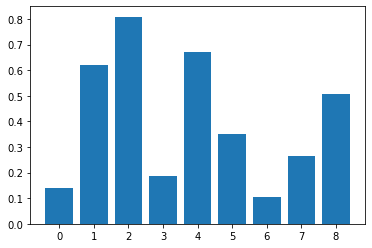

LeveneResult(statistic=187.97892596659415, pvalue=1.15103226837052e-295)
NormaltestResult(statistic=486.9355293994964, pvalue=1.8335521621510908e-106) LeveneResult(statistic=187.97892596659415, pvalue=1.15103226837052e-295)
LeveneResult(statistic=176.45271356315115, pvalue=2.755302067054689e-39)
Compare v2x_libdem, of cluster 0  against: 1 : Ttest_indResult(statistic=-101.1694546363676, pvalue=0.0)

LeveneResult(statistic=228.53763083253617, pvalue=1.0201179086916495e-49)
Compare v2x_libdem, of cluster 0  against: 2 : Ttest_indResult(statistic=-158.6319556490089, pvalue=0.0)

LeveneResult(statistic=59.606870535994105, pvalue=1.4987023034662006e-14)
Compare v2x_libdem, of cluster 0  against: 3 : Ttest_indResult(statistic=-11.142764620532988, pvalue=2.3012786674160214e-28)

LeveneResult(statistic=35.92979039478498, pvalue=2.3069477169561784e-09)
Compare v2x_libdem, of cluster 0  against: 4 : Ttest_indResult(statistic=-103.17667738277696, pvalue=0.0)

LeveneResult(statistic=58.84422253583

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


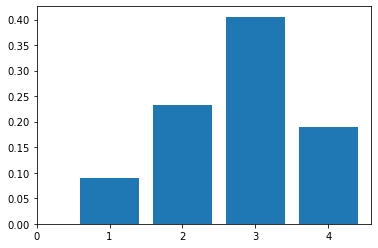

LeveneResult(statistic=nan, pvalue=nan)

NormaltestResult(statistic=3.271097419712421, pvalue=0.19484542835456614) LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=2.9086840212714473, pvalue=0.10530024084323238)
LeveneResult(statistic=47.21219169939711, pvalue=5.33467702859077e-10)
Compare v2x_libdem, of cluster 1  against: 3 : Ttest_indResult(statistic=-3.45714889888448, pvalue=0.0008002225511968929)

LeveneResult(statistic=16.628710643891807, pvalue=0.0004055845622606291)
Compare v2x_libdem, of cluster 1  against: 4 : Ttest_indResult(statistic=-9.662125837452093, pvalue=6.386740319822772e-10)



NormaltestResult(statistic=1770.0649148453733, pvalue=0.0) LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=47.21219169939711, pvalue=5.33467702859077e-10)
Compare v2x_libdem, of cluster 3  against: 1 : Ttest_indResult(statistic=3.45714889888448, pvalue=0.0008002225511968929)

LeveneRes

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Thoma\.conda\envs\thesisProject\lib\

In [35]:
import scipy.stats as scStat

setsToCompare = ["gmmLabels-95","kmmLabels-95","LinkLabels-58"]

for setToCompare in setsToCompare:
    clusters = len(checkingMatrix[setToCompare].unique())
    democracyScore = "v2x_libdem"

    clusters = len(checkingMatrix[setToCompare].unique())

    bars = [np.mean(checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values) for i in range(clusters)]
    plt.bar(range(clusters),bars)
    plt.xticks(range(clusters))
    plt.show()


    # zeroArray = np.zeros((clusters+1,clusters+1))
    zeroArray = [[0]*(clusters+1)]*(clusters+1)

    barlett = [checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values for i in range(clusters)]
    barlettTest = scStat.levene(*barlett)

    print(barlettTest)

    for i in range(clusters):
        # print(len(checkingMatrix[checkingMatrix[setToCompare]==i]["v2x_partipdem"]))
        compareSet = checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values
        if len(compareSet) > 8:
            normality_v2X_PartiDem = scStat.normaltest(compareSet)
            print(normality_v2X_PartiDem, barlettTest)
            for z in range(clusters):
                tTest = 0
                if i != z:
                    compareSet2 = checkingMatrix[checkingMatrix[setToCompare]==z][democracyScore].dropna().values
                    levene = scStat.levene(compareSet,compareSet2)
                    print(levene)

                    if len(compareSet2) > 8:
                        tTest = scStat.ttest_ind(compareSet,compareSet2)
                        zeroArray[i][z] = str(tTest[1])+ ";" + str(levene[1])
                        print("Compare "+ democracyScore +", of cluster", i, " against:", z, ":", tTest)
                        print("")
                else:
                    zeroArray[i][z] = 1
        print("")
    save = np.array(zeroArray)
    np.savetxt(setToCompare+".csv", save, delimiter=",", fmt='%s')